In [ ]:
import numpy as np

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def sigmoid_prime(z):
  return sigmoid(z) * sigmoid(1 - z)

def sigmoid_prime(z):
  return sigmoid(z) * (1 - sigmoid(z))

In [ ]:
class MLP:

  def __init__(self, nin, nouts):
    sizes = [nin] + nouts
    self.biases = [np.random.randn(y, 1) for y in nouts]
    self.weights = [np.random.randn(sizes[i+1], sizes[i]) for i in range(len(nouts))]

  def __call__(self, x):
    self.a = [x]
    self.zs = []
    for w, b in zip(self.weights, self.biases):
      z = w @ x + b
      x = sigmoid(z)
      self.a.append(x)
      self.zs.append(z)
    return x

  def backward(self, x, y):
    self(x)

    nabla_b = [np.zeros(b.shape) for b in self.biases]
    nabla_w = [np.zeros(w.shape) for w in self.weights]

    d = (self.a[-1] - y) * sigmoid_prime(self.zs[-1])
    nabla_b[-1] = d
    nabla_w[-1] = d @ self.a[-2].T

    for l in range(1, len(self.biases)):
      d = self.weights[-l].T @ d * sigmoid_prime(self.zs[-l-1])
      nabla_b[-l-1] = d
      nabla_w[-l-1] = d @ self.a[-l-2].T

    return nabla_b, nabla_w

  def SGD(self, training_data, eta, mini_batch_size):
    np.random.shuffle(training_data)
    mini_batches = [training_data[k:k+mini_batch_size] for k in range(0, len(training_data), mini_batch_size)]
    for mini_batch in mini_batches:
      nabla_b_sum = [np.zeros(b.shape) for b in self.biases]
      nabla_w_sum = [np.zeros(w.shape) for w in self.weights]
      for x, y in mini_batch:
        nabla_b, nabla_w = self.backward(x, y)
        nabla_b_sum = [nb + nbs for nb, nbs in zip(nabla_b_sum, nabla_b)]
        nabla_w_sum = [nw + nws for nw, nws in zip(nabla_w_sum, nabla_w)]
      self.biases = [b - eta * (nbs / mini_batch_size) for b, nbs in zip(self.biases, nabla_b_sum)]
      self.weights = [w - eta * (nws / mini_batch_size) for w, nws in zip(self.weights, nabla_w_sum)]

  def evaluate(self, test_data):
    test_results = [(np.argmax(self(x)), np.argmax(y)) for (x, y) in test_data]
    y_correct = sum([int(x == y) for (x, y) in test_results])
    print (f"Accuracy on test data: {y_correct * 100.0 / len(test_data)}")

In [ ]:
n = MLP(3, [4, 1])

In [ ]:
xs = np.random.choice(np.arange(-3.0, 3, 0.5), size=(4, 3))
xs

array([[-1.5,  2.5, -3. ],
       [ 0.5, -3. ,  2. ],
       [ 0.5,  1. ,  0. ],
       [-2. ,  0. ,  2.5]])

In [ ]:
ys = np.random.choice(np.arange(0, 2, 1.0), size=(4, 1))
ys

array([[0.],
       [0.],
       [1.],
       [0.]])

In [ ]:
training_data = [(x[:, np.newaxis], y[:, np.newaxis]) for x, y in zip(xs, ys)]
training_data

[(array([[-1.5],
         [ 2.5],
         [-3. ]]),
  array([[0.]])),
 (array([[ 0.5],
         [-3. ],
         [ 2. ]]),
  array([[0.]])),
 (array([[0.5],
         [1. ],
         [0. ]]),
  array([[1.]])),
 (array([[-2. ],
         [ 0. ],
         [ 2.5]]),
  array([[0.]]))]

In [ ]:
n(xs.T)

array([[0.67320108, 0.72760711, 0.77232152, 0.81029871]])

In [ ]:
for i in range(50000):
  n.SGD(training_data, 0.5)
n(xs.T)

array([[0.0024432 , 0.00704232, 0.99576682, 0.00248631]])

In [ ]:
n = MLP(784, [30, 10])

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_train = x_train / 255.0
y_train = np.eye(10)[y_train]
training_data = [(x[:, np.newaxis], y[:, np.newaxis]) for x, y in zip(x_train, y_train)]

x_test = x_test.reshape(10000, 784)
x_test = x_test / 255.0
y_test = np.eye(10)[y_test]
test_data = [(x[:, np.newaxis], y[:, np.newaxis]) for x, y in zip(x_test, y_test)]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
for i in range(10):
  print(f"Epoch {i}")
  n.SGD(training_data, 3.0, 10)
  n.evaluate(test_data)

Epoch 0
Accuracy on test data: 91.33
Epoch 1
Accuracy on test data: 93.22
Epoch 2
Accuracy on test data: 93.3
Epoch 3
Accuracy on test data: 94.11
Epoch 4
Accuracy on test data: 94.01
Epoch 5
Accuracy on test data: 94.25
Epoch 6
Accuracy on test data: 94.16
Epoch 7
Accuracy on test data: 94.83
Epoch 8
Accuracy on test data: 94.88
Epoch 9
Accuracy on test data: 94.61


TypeError: Invalid shape (784,) for image data

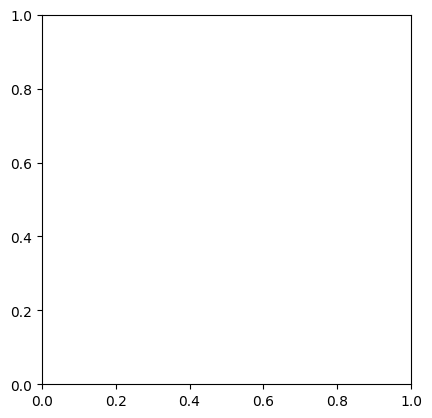

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2], cmap='gray')

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
from PIL import Image
image = Image.open('test.jpg')
image = image.convert('L')
image = np.array(image)

image = image / 255.0

plt.imshow(image, cmap='gray')

FileNotFoundError: [Errno 2] No such file or directory: '/content/test.jpg'

In [ ]:
image = image.reshape(784, 1)
np.argmax(n(image))

7

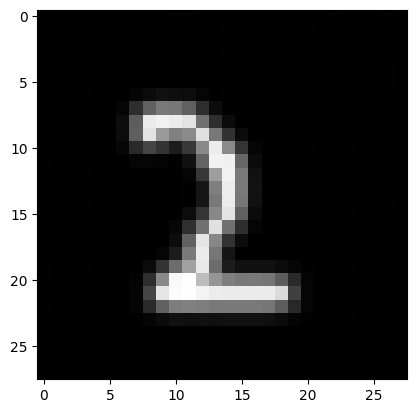

In [ ]:
from PIL import Image
image = Image.open('two.jpg')
image = image.convert('L')
image = np.array(image)

image = image / 255.0

plt.imshow(image, cmap='gray')

In [ ]:
image = image.reshape(784, 1)
np.argmax(n(image))

2

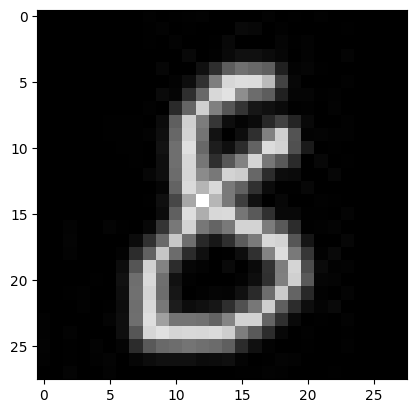

In [ ]:
from PIL import Image
image = Image.open('eight.jpg')
image = image.convert('L')
image = np.array(image)

image = image / 255.0

plt.imshow(image, cmap='gray')

In [ ]:
image = image.reshape(784, 1)
np.argmax(n(image))

8

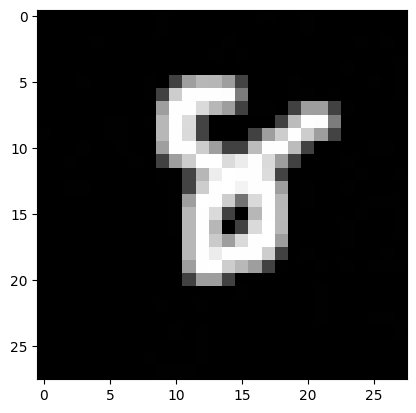

In [ ]:
from PIL import Image
image = Image.open('eight-1.jpg')
image = image.convert('L')
image = np.array(image)

image = image / 255.0

plt.imshow(image, cmap='gray')

In [ ]:
image = image.reshape(784, 1)
np.argmax(n(image))


9